In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
plt.style.use('ggplot')

Import dataset

In [2]:
dtype = {'admtype': 'int8',
 'age': 'float16',
 'asource': 'category',
 'campus': 'category',
 'diag_adm': 'category',
 'diag_cat3': 'category',
 'diag_cat4': 'category',
 'er_mode': 'int8',
 'moa': 'int8',
 'pay_ub92': 'int8',
 'provider': 'int8',
 'pt_state': 'category',
 'race': 'int8',
 'sex': 'int8',
 'tot': 'float64',
 'yoa': 'int8'}

In [3]:
df0 = pd.read_csv('df_sample_cleansed2.csv', dtype=dtype, low_memory=False)
#df0 = pd.read_csv('df_cleansed2.csv', dtype=dtype, low_memory=False)
#df3 = pd.read_csv('df_sample_coded.csv', low_memory=False)
#df3 = pd.read_csv('df_binary.csv', low_memory=False)
#df3 = pd.read_csv('df3_arrival.csv', low_memory=False)

In [4]:
#df3 = df3.drop(['Unnamed: 0'], axis='columns')

In [5]:
df0.head()

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,tot,pt_state,diag_adm,campus,er_mode,race,diag_cat3,diag_cat4
0,1,63.0,2,5,12,7,1,7,21071.0,RI,49121,3,0,1,491,4912
1,1,66.0,2,10,5,5,1,7,14791.0,RI,4359,0,0,1,435,4359
2,4,0.0,2,14,2,10,4,S,2501.0,RI,V3000,0,0,1,V30,V300
3,2,74.0,1,13,8,9,1,7,9444.0,RI,5990,0,1,1,599,5990
4,4,37.0,2,3,7,5,3,7,8771.0,RI,66704,0,9,5,667,6670


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
pay_ub92     20000 non-null int8
age          20000 non-null float16
sex          20000 non-null int8
provider     20000 non-null int8
moa          20000 non-null int8
yoa          20000 non-null int8
admtype      20000 non-null int8
asource      20000 non-null category
tot          20000 non-null float64
pt_state     20000 non-null category
diag_adm     20000 non-null category
campus       20000 non-null category
er_mode      20000 non-null int8
race         20000 non-null int8
diag_cat3    20000 non-null category
diag_cat4    20000 non-null category
dtypes: category(6), float16(1), float64(1), int8(8)
memory usage: 698.4 KB


In [7]:
df0.isna().sum()

pay_ub92     0
age          0
sex          0
provider     0
moa          0
yoa          0
admtype      0
asource      0
tot          0
pt_state     0
diag_adm     0
campus       0
er_mode      0
race         0
diag_cat3    0
diag_cat4    0
dtype: int64

## Transformation

In [8]:
def simplify_state(df):
    """Group states"""
    state_codes = ['RI', 'MA', 'NY', 'FL', '9']
    df.pt_state = df.pt_state.cat.set_categories(state_codes)
    df.pt_state = df.pt_state.fillna('9')
    return df

In [9]:
def simplify_age(df):
    """Reduce ages over 100 to 100"""
    df.age = df.age.where(df.age < 100, other=100)
    return df

In [10]:
def transform_target(df):
    
    return df

In [11]:
def transform_features(df):
    """Execute transformations"""
    df = simplify_state(df)
    df = simplify_age(df)
    #df = transform_target(df)
    return df

In [12]:
df1 = transform_features(df0)

## Feature Selection

In [13]:
drop_col = ['diag_cat3', 'diag_cat4']
df2 = df1.drop(drop_col, axis=1)

## One-Hot-Encoding

In [14]:
col = ['pay_ub92', 'provider', 'admtype', 'asource', 'pt_state', 'campus', 'er_mode', 'race', 'diag_adm']
df2 = pd.get_dummies(df2, columns=col, prefix=col)

## Split data set into Train and Test

In [15]:
df2.head()

,age,sex,moa,yoa,tot,pay_ub92_1,pay_ub92_2,pay_ub92_3,pay_ub92_4,pay_ub92_5,...,diag_adm_V594,diag_adm_V6284,diag_adm_V643,diag_adm_V667,diag_adm_V702,diag_adm_V714,diag_adm_V716,diag_adm_V7189,diag_adm_V8409,diag_adm_XXX
0,63.0,2,12,7,21071.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66.0,2,5,5,14791.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,2,10,2501.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,74.0,1,8,9,9444.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,2,7,5,8771.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_index = pd.read_csv("Train_Index.csv")
test_index = pd.read_csv("Test_Index.csv")

#train = df2.loc[train_index['0']]
#test = df2.loc[test_index['0']]


In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.2, random_state=0)

In [18]:
train.shape

(16000, 1835)

In [19]:
test.shape

(4000, 1835)

## Balance

Sampling parameters

In [20]:
#bins = [0, 10000, 20000, 30000]
#size = [300000, 300000, 300000]

bins = [0, 10000, 20000, 30000]
size = [3000, 3000, 3000]

Graph

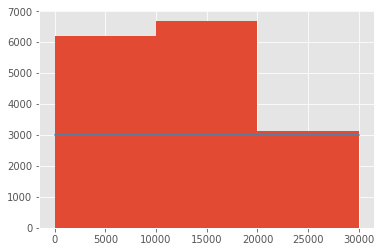

In [22]:
train['tot'].hist(bins=bins)
x = np.linspace(0, 30000, 2)
plt.gca().plot(x, [size[0]]*len(x))

In [23]:
#s1 = np.random.choice(train[(train['tot'] > 0) & (train['tot'] <= 10000)].index, size=size[0], replace=False)
#s2 = np.random.choice(train[(train['tot'] > 10000) & (train['tot'] <= 20000)].index, size=size[1], replace=False)
#s3 = np.random.choice(train[(train['tot'] > 20000) & (train['tot'] <= 30000)].index, size=size[2], replace=True)
#s = np.concatenate((s1, s2, s3))
#len(s)

In [24]:
s = np.array([])
for i in range(len(bins) - 1):
    d = train[(train['tot'] > bins[i]) & (train['tot'] <= bins[i+1])]
    sb = np.random.choice(d.index, size=size[i], replace=size[i] > len(d))
    s = np.concatenate((s, sb))
    print(len(s))

3000
6000
9000


Balance sample

In [25]:
train_balanced = train.loc[s]

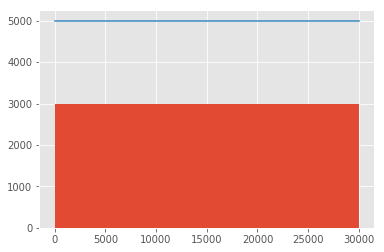

In [26]:
train_balanced['tot'].hist(bins=bins)
x = np.linspace(0, 30000, 2)
plt.gca().plot(x, [5000]*len(x))

In [27]:
X_train = train_balanced.drop(columns=['tot'])
X_test = test.drop(columns=['tot'])
y_train = train_balanced.tot.astype(float)
y_test = test.tot.astype(float)

In [28]:
X_train.shape

(9000, 1834)

## Normalize Transform

In [29]:
def normalize_attr(train, test, attrs):
    for feature_name in attrs:
        max_value = train[feature_name].max()
        min_value = train[feature_name].min()
        train[feature_name] = (train[feature_name] - min_value) / (max_value - min_value)
        test[feature_name] = (test[feature_name] - min_value) / (max_value - min_value)
    return train, test

In [30]:
#X_train, X_test = normalize_attr(X_train.copy(), X_test.copy(), ['age'])

In [31]:
def normalize_target(train, test):
    max_value = train.max()
    min_value = train.min()
    train = (train - min_value) / (max_value - min_value)
    test = (test - min_value) / (max_value - min_value)
    return train, test

In [32]:
#y_train, y_test = normalize_target(y_train.copy(), y_test.copy())

In [33]:
y_train.describe()

count     9000.000000
mean     14898.507778
std       8105.426219
min         15.000000
25%       8005.250000
50%      14324.500000
75%      21826.250000
max      29993.000000
Name: tot, dtype: float64

In [34]:
#train, test = train_test_split(df2, test_size=0.2, random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)
#print(train.shape)
#print(test.shape)

(9000, 1834)
(4000, 1834)


## Count Encoding

In [36]:
#diag_counts = train[['diag_cat3', 'tot']].groupby(by='diag_cat3').mean().to_dict()['tot']
#other = train.tot.mean

In [37]:
#def lookup_count(attr):
#    try:
#        return diag_counts[attr]
#    except KeyError:
#        return other   

In [38]:
#def count_encode(df, attr):
#    encoded = df[attr].apply(lookup_count)
#    df = df.assign(diag_encoded=encoded.values)
#    df.diag_encoded = df.diag_encoded/df.diag_encoded.max()
#    df = df.drop(attr, axis=1)
#    return df

In [39]:
#train = count_encode(train, 'diag_cat3')
#test = count_encode(test, 'diag_cat3')

In [40]:
#X_train = train.drop('tot', axis=1)
#X_test = test.drop('tot', axis=1)
#y_train = train.tot
#y_test = test.tot

In [41]:
#X_train.head()

In [42]:
#X_train.describe()

## Model Testing

In [43]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
def print_model_score(train_predicted, test_predicted):
    train_rmse = mean_squared_error(y_train, train_predicted)**.5
    train_r2 = r2_score(y_train, train_predicted)
    test_rmse = mean_squared_error(y_test, test_predicted)**.5
    test_r2 = r2_score(y_test, test_predicted)
    print("Train RMSE:\t{}".format(train_rmse))
    print("Train R2 Score:\t{}".format(train_r2))
    print("Test RMSE:\t{}".format(test_rmse))
    print("Test R2 Score:\t{}".format(test_r2))

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
model = DecisionTreeRegressor(min_samples_split=.05)
model.fit(X_train, y_train)
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

In [47]:
print_model_score(train_predicted, test_predicted)

Train RMSE:	6647.77234168233
Train R2 Score:	0.327257568759849
Test RMSE:	6469.189608408547
Test R2 Score:	0.25232710713185547


In [48]:
fi = model.feature_importances_
col = X_train.columns
feat_imp = pd.DataFrame(fi, columns=['Importance'],index=col).sort_values(by='Importance', ascending=False)
print(feat_imp)

                Importance
admtype_4         0.535560
age               0.123914
yoa               0.089620
asource_7         0.051767
provider_1        0.024697
diag_adm_71536    0.020640
er_mode_0         0.019998
provider_9        0.019562
provider_6        0.012968
admtype_3         0.012490
provider_4        0.010853
campus_3          0.010486
pay_ub92_1        0.010466
provider_10       0.008083
asource_1         0.005282
admtype_2         0.003829
diag_adm_V3000    0.003664
pay_ub92_9        0.003601
asource_2         0.003594
pay_ub92_13       0.002307
campus_4          0.002159
diag_adm_78605    0.002135
pay_ub92_11       0.002103
provider_14       0.001975
diag_adm_78061    0.001941
diag_adm_7802     0.001772
diag_adm_V240     0.001767
diag_adm_2989     0.001704
diag_adm_4660     0.001572
diag_adm_64413    0.001535
...                    ...
diag_adm_42731    0.000000
diag_adm_43311    0.000000
diag_adm_43331    0.000000
diag_adm_4420     0.000000
diag_adm_44021    0.000000
d

## Lasso Regression

In [49]:
from sklearn.linear_model import Lasso

In [50]:
model = Lasso()
model.fit(X_train, y_train)
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [51]:
print_model_score(train_predicted, test_predicted)

Train RMSE:	6051.481523427692
Train R2 Score:	0.4425319689198026
Test RMSE:	6166.910892247938
Test R2 Score:	0.3205660853585711


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

In [ ]:
print_model_score(train_predicted, test_predicted)

## Boosting

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [53]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
model = GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

In [54]:
print_model_score(train_predicted, test_predicted)

Train RMSE:	6265.9782525595
Train R2 Score:	0.4023123111764477
Test RMSE:	6185.109016132981
Test R2 Score:	0.3165502446756262


## XGBoost

In [55]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [67]:
# fit model to training data
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.3, 'loss': 'ls'}
model = XGBRegressor(**params)
#model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, loss='ls',
       max_delta_step=0, max_depth=4, min_child_weight=1,
       min_samples_split=2, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [68]:
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

In [69]:
print_model_score(train_predicted, test_predicted)

Train RMSE:	5328.8961181853765
Train R2 Score:	0.567714117989631
Test RMSE:	6204.90488169729
Test R2 Score:	0.31216838804077807


## Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model = RandomForestRegressor(n_estimators=10, criterion='mae')
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

In [73]:
print_model_score(train_predicted, test_predicted)

Train RMSE:	2920.3260161036246
Train R2 Score:	0.8701747347071828
Test RMSE:	6572.9330761330875
Test R2 Score:	0.22815464343104275


## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor()
model.fit(X_train, y_train)

In [ ]:
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

In [ ]:
print_model_score(train_predicted, test_predicted)